# Exploration numerique 3

## Importation des librairies

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
import scipy.stats as sps
import pandas as pd
import seaborn as sns

## Importation du dataset

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
#print(breast_cancer_wisconsin_diagnostic.metadata)

n,d = X.shape
# 5 premieres lignes
X.head(5)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 1 - Boxplot de chacun des 10 premiers attributs

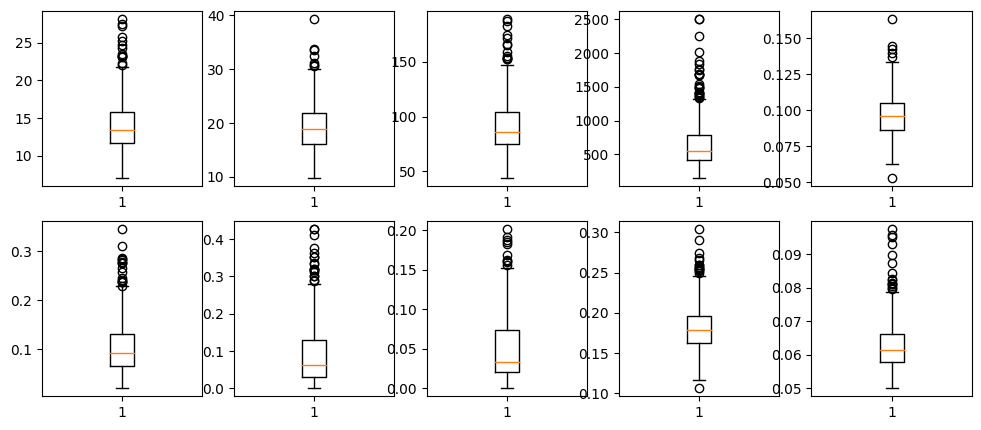

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(12,5))
for i in range(10):
    ab = 0 if i < 5 else 1
    ob = i if i <5 else i - 5
    axs[ab,ob].boxplot(X.iloc[:,i])

<b>Commentaire: </b>

## 2- Correlation heatmap

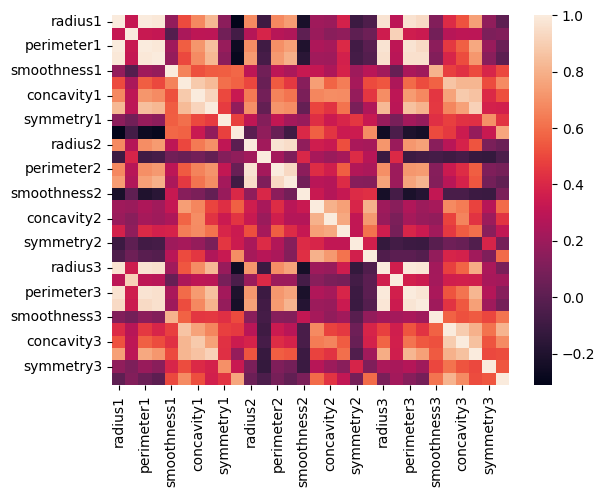

In [ ]:
sns.heatmap(X.corr());

## 3 - Commentaire

On se rend compte que les variables "Perimetre" et "Rayon" sont fortement correlees, il en est de meme pour les concavites de types 1 et 3.

## 4 - Boxplot des attributs apres ACP

(30, 30)


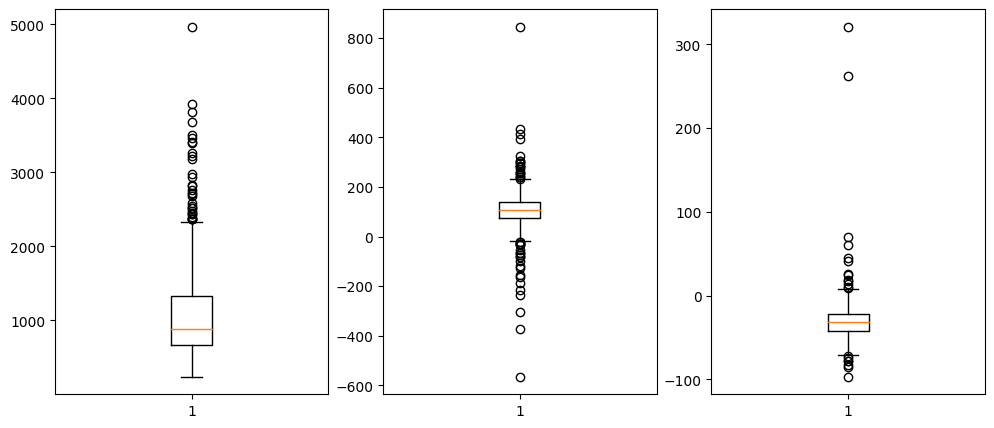

In [ ]:
cov_matrix = np.cov(X, rowvar=False)
#print(cov_matrix.shape)
eigVal, eigVec = np.linalg.eig(cov_matrix)
print(eigVec.shape)

eigVecS = np.array([x for _,x in sorted(zip(eigVal, eigVec), reverse=True)])
#print(eigVecS)
A = eigVecS[:,0:3]
#print(A.shape)
Xp = np.zeros((n,3))
for i in range(n):
  Xp[i] = np.dot(A.T,X.iloc[i].to_numpy())

fig, axs = plt.subplots(1, 3, figsize=(12,5))
for i in range(3):
    axs[i].boxplot(Xp[:,i])

## Nouvelle correlation heatmap

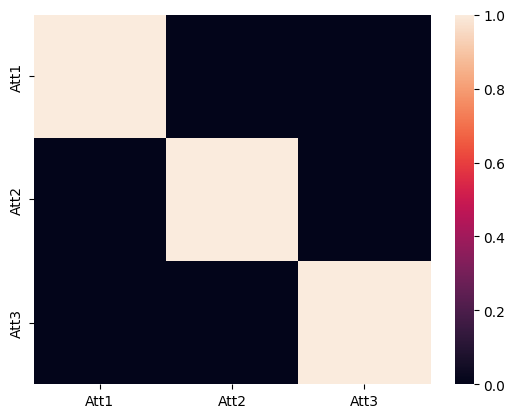

In [ ]:
dXp = pd.DataFrame(Xp, columns = ['Att1','Att2','Att3'])
sns.heatmap(dXp.corr());

## 6 - Visualisation des données

In [114]:
yP = y.to_numpy()

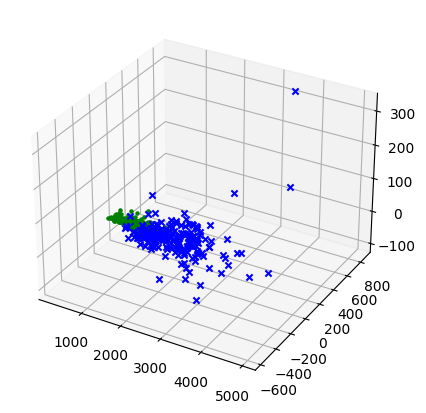

In [122]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(projection='3d')
for i in range(n):
  if(yP[i] == 'M' ):
    ax.scatter(Xp[i,0],Xp[i,1],Xp[i,2], marker='x', color='b')
  else:
    ax.scatter(Xp[i,0],Xp[i,1],Xp[i,2], marker='.', color='g')

7 - Visualisation des classes sur deux composantes principales

### [$e_1,e_2$], [$e_1,e_3$], [$e_2,e_3$]

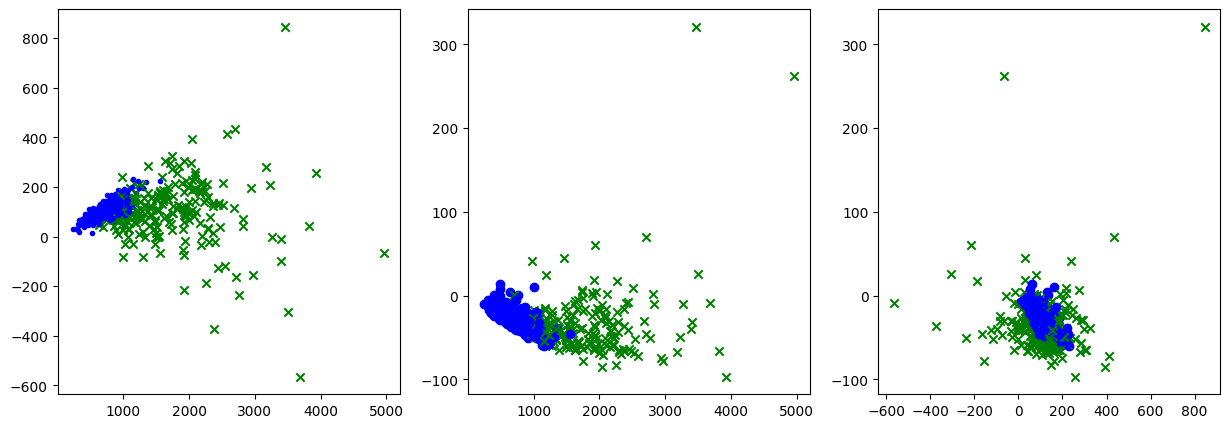

In [121]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
for i in range(n):
  if(yP[i] == 'M'):
    ax[0].scatter(Xp[i,0], Xp[i,1], marker='x', color='g')
    ax[1].scatter(Xp[i,0], Xp[i,2], marker='x', color='g')
    ax[2].scatter(Xp[i,1], Xp[i,2], marker='x', color='g')
  else:
    ax[0].scatter(Xp[i,0], Xp[i,1], marker='.', color='b')
    ax[1].scatter(Xp[i,0], Xp[i,2], label='.', color='b')
    ax[2].scatter(Xp[i,1], Xp[i,2], label='.', color='b')


## 8 - Analyse lineaire discriminante

In [138]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
yPr = yP.reshape(-1)
print(clf)

LinearDiscriminantAnalysis()


In [144]:
yDum = np.array([0 if x=='B' else 1 for x in yPr])

## 9 - Frontiere de decision

### [$e_1,e_2$], [$e_1,e_2$], [$e_2,e_3$]

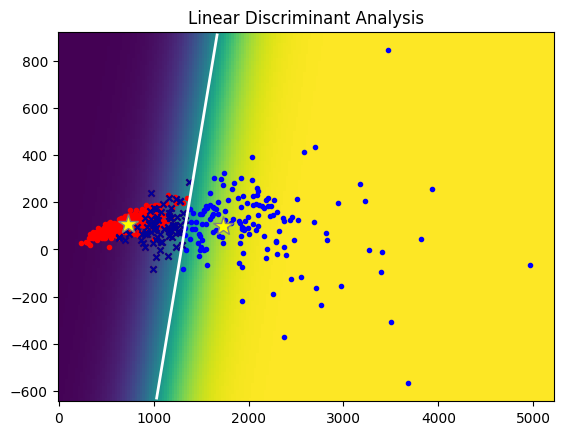

In [177]:
from matplotlib import colors
def plot_data(lda, X, y, y_pred):
    fig = plt.figure()
    plt.title("Linear Discriminant Analysis")

    tp = y == y_pred  # True Positive
    tpB, tpM = tp[y == 0], tp[y == 1]
    XB, XM = X[y == 0], X[y == 1]
    XB_tp, XB_fp = XB[tpB], XB[~tpB]
    XM_tp, XM_fp = XM[tpM], XM[~tpM]

    # class 0: dots
    plt.scatter(XB_tp[:, 0], XB_tp[:, 1], marker=".", color="red")
    plt.scatter(XM_fp[:, 0], XM_fp[:, 1], marker="x", s=20, color="#990000")  # dark red

    # class 1: dots
    plt.scatter(XM_tp[:, 0], XM_tp[:, 1], marker=".", color="blue")
    plt.scatter(
        XM_fp[:, 0], XM_fp[:, 1], marker="x", s=20, color="#000099"
    )  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(
        xx, yy, Z, norm=colors.Normalize(0.0, 1.0), zorder=0
    )
    plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="white")

    # means
    plt.plot(
        lda.means_[0][0],
        lda.means_[0][1],
        "*",
        color="yellow",
        markersize=15,
        markeredgecolor="grey",
    )
    plt.plot(
        lda.means_[1][0],
        lda.means_[1][1],
        "*",
        color="yellow",
        markersize=15,
        markeredgecolor="grey",
    )

    return fig
y_pred = np.array(clf.fit(Xp[:,:2], yDum).predict(Xp[:,:2]))
fig = plot_data(clf, Xp[:,:2], yDum, y_pred)

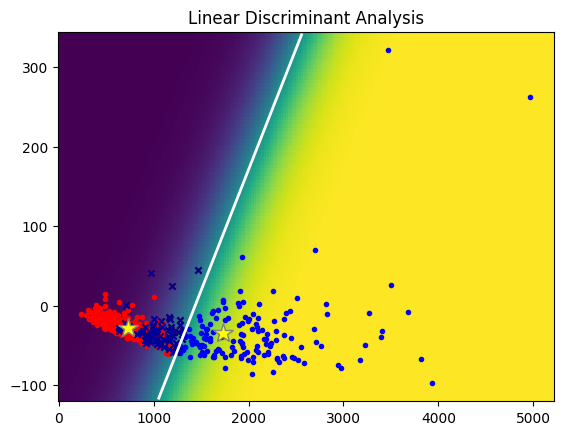

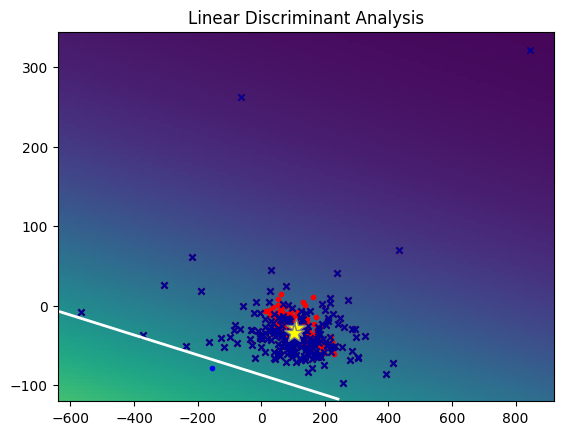

In [178]:

y_pred = np.array(clf.fit(Xp[:,[0,2]], yDum).predict(Xp[:,[0,2]]))
fig = plot_data(clf, Xp[:,[0,2]], yDum, y_pred)

y_pred = np.array(clf.fit(Xp[:,[1,2]], yDum).predict(Xp[:,[1,2]]))
fig = plot_data(clf, Xp[:,[1,2]], yDum, y_pred)


10 - Analyse quadratique discriminante

In [179]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()


### 11 - Frontiere de decision

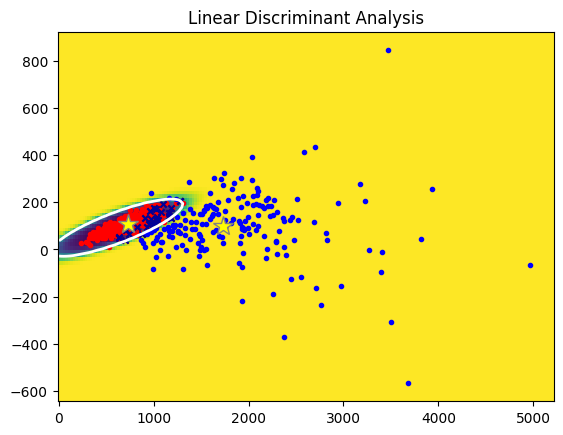

In [180]:
y_pred = np.array(qda.fit(Xp[:,:2], yDum).predict(Xp[:,:2]))
fig = plot_data(qda, Xp[:,:2], yDum, y_pred)

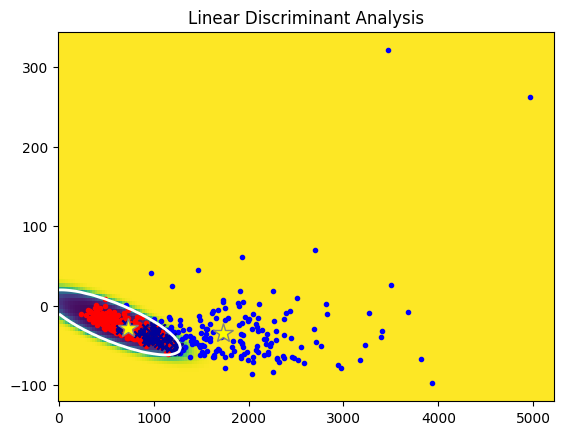

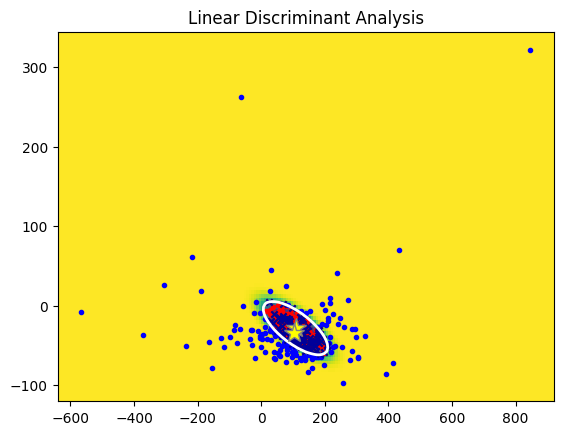

In [181]:

y_pred = np.array(qda.fit(Xp[:,[0,2]], yDum).predict(Xp[:,[0,2]]))
fig = plot_data(qda, Xp[:,[0,2]], yDum, y_pred)

y_pred = np.array(qda.fit(Xp[:,[1,2]], yDum).predict(Xp[:,[1,2]]))
fig = plot_data(qda, Xp[:,[1,2]], yDum, y_pred)


In [183]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, precision_score, recall_score


# Initialiser le KFold
kf = KFold(n_splits=10)

# Calculer la précision et le rappel pour LDA
precision_lda = cross_val_score(clf, Xp, yDum, cv=kf, scoring=make_scorer(precision_score))
recall_lda = cross_val_score(clf, Xp, yDum, cv=kf, scoring=make_scorer(recall_score))

# Calculer la précision et le rappel pour QDA
precision_qda = cross_val_score(qda, Xp, yDum, cv=kf, scoring=make_scorer(precision_score))
recall_qda = cross_val_score(qda, Xp, yDum, cv=kf, scoring=make_scorer(recall_score))

# Afficher les résultats
print("LDA Precision: ", precision_lda.mean())
print("LDA Recall: ", recall_lda.mean())
print("QDA Precision: ", precision_qda.mean())
print("QDA Recall: ", recall_qda.mean())


LDA Precision:  0.9767521367521368
LDA Recall:  0.711741519350215
QDA Precision:  0.9336300366300365
QDA Recall:  0.8518497806541285
